# UCL AI Society Machine Learning Tutorials
### Session 04. Hand written digit recognition (TF and Keras)

### Contents
1. Perceptrons
2. Digit recognition using Tensorflow
3. Digit recognition using Pytorch

### Aim
At the end of this session, you will be able to:
- understand perceptrons in logistic regression mindset
- understand feed-forward ANN
- feel the differences of top two famous DL framework

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


First Download Dataset from Kaggle: https://www.kaggle.com/c/digit-recognizer/data  
Then, place the dataset under ./data

In [2]:
# You can follow my file path, but you can set your own too.
train = pd.read_csv("./data/digit-recognizer/train.csv")
test = pd.read_csv("./data/digit-recognizer/test.csv")
X_train = train.drop(labels=["label"], axis=1)
Y_train = train['label']
del train

In [3]:
# normalise
X_train = X_train / 255.0
test = test / 255.0

# reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Y_train = to_categorical(Y_train, num_classes = 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [4]:
X_train.shape, Y_train.shape

((37800, 28, 28, 1), (37800, 10))

In [5]:
CNN = True

In [6]:
if not CNN:
    model = Sequential()

    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = "softmax"))

In [7]:
# CNN
if CNN:
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                     activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [8]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [11]:
epochs = 25
batch_size = 64

# Early Stopping
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val), verbose = 2, callbacks=[callback])

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
 - 100s - loss: 0.2209 - accuracy: 0.9295 - val_loss: 0.0747 - val_accuracy: 0.9748
Epoch 2/25
 - 97s - loss: 0.0735 - accuracy: 0.9782 - val_loss: 0.0460 - val_accuracy: 0.9864
Epoch 3/25
 - 96s - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 4/25
 - 96s - loss: 0.0477 - accuracy: 0.9865 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 5/25
 - 97s - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0667 - val_accuracy: 0.9867
Epoch 6/25
 - 101s - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 7/25
 - 100s - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0294 - val_accuracy: 0.9914
Epoch 8/25
 - 102s - loss: 0.0374 - accuracy: 0.9897 - val_loss: 0.0321 - val_accuracy: 0.9917
Epoch 9/25
 - 98s - loss: 0.0362 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 10/25
 - 99s - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.0388 - val_accuracy: 0.9907
Epoch 

In [12]:
model.save('./data/digit-recognizer/keras_digit_recogniser_model')

In [13]:
import matplotlib.pyplot as plt

W1203 00:26:43.800143 4337360384 __init__.py:820] Duplicate key in file '/Users/toeun_kim/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


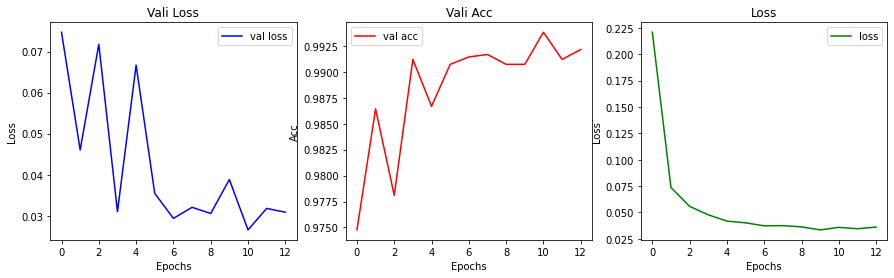

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(history.history['val_loss'], color='b', label="val loss")
axes[0].set_title("Vali Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history.history['val_accuracy'], color='r', label="val acc")
axes[1].set_title("Vali Acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Acc")
axes[1].legend()

axes[2].plot(history.history['loss'], color='green', label="loss")
axes[2].set_title("Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.show()

In [23]:
pred = model.predict(test)
pred_classes = np.argmax(pred, axis = 1)
result = pd.Series(pred_classes, name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), result],axis = 1)

submission.to_csv("./data/digit-recognizer/submission.csv",index=False)

In [24]:
result

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

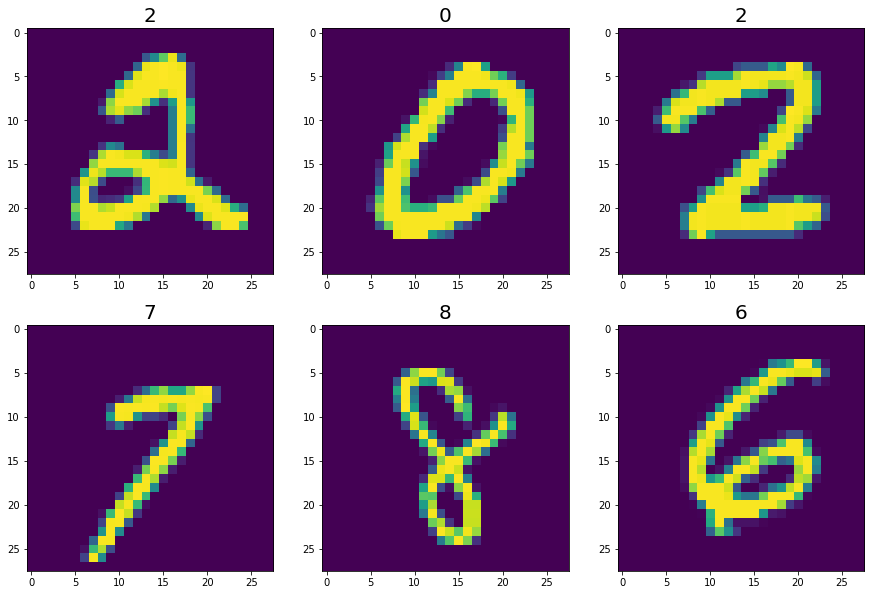

In [25]:
fig,ax=plt.subplots(2,3,figsize=(15,10))

for i in range(2):
    for j in range(3):
        selected_rand = np.random.randint(0,len(test))
        img = test[selected_rand]
        img = img.reshape((28,28))
        ax[i][j].imshow(img)
        ax[i][j].set_title(pred_classes[selected_rand],fontsize=20)

## Your mission is to improve this recognizer

**You can improve this by**:  
- Different preprocessing method
    - Normalisation
    - Label Encoding
- Hyperparameter Tuning 
    - Number of nodes
    - learning rate
    - dropout rate
    - activations
    - epochs
    - batch size
    - type of loss function
- Better optimiser
- Better architecture of perceptrons
- Convolutional Neural Network
- Regularisation
    - Batch Normalisation
    - Dropout
- Learning rate scheduling
- Early stopping